In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

# our library
from sat_metropolis import mcmc, sat, smt, models

In [2]:
num_con = 3
reduction_factor = 2
num_bits = 11
max_int_bv = 2**10-1

In [3]:
(g, num_bits, num_vars) = models.get_roads_sat(num_bits = num_bits,
                                               max_int_bv = max_int_bv,
                                               num_con=num_con,
                                               y_reduction_factor=reduction_factor)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='spur',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000, 
                                           num_chains=4)

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	649/649/0
independent support size:  	0
clauses (all/long/binary/unit): 2727/2094/609/24
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	537 MB

STAGE #1: Build the initial partial assignments

time elapsed: 60.7534s

time elapsed: 121.754s

time elapsed: 182.753s
ZH - Rehash the table.
ts 2097152 2097151
ZH - Number of collisions.
coll 100936

time elapsed: 243.754s
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	537 MB

Completing sample #1 of 9475 which has 127 variables unset and 1 sample.
Completing sample #2 of 9475 which has 50 variables unset and 1 sample.
Comple

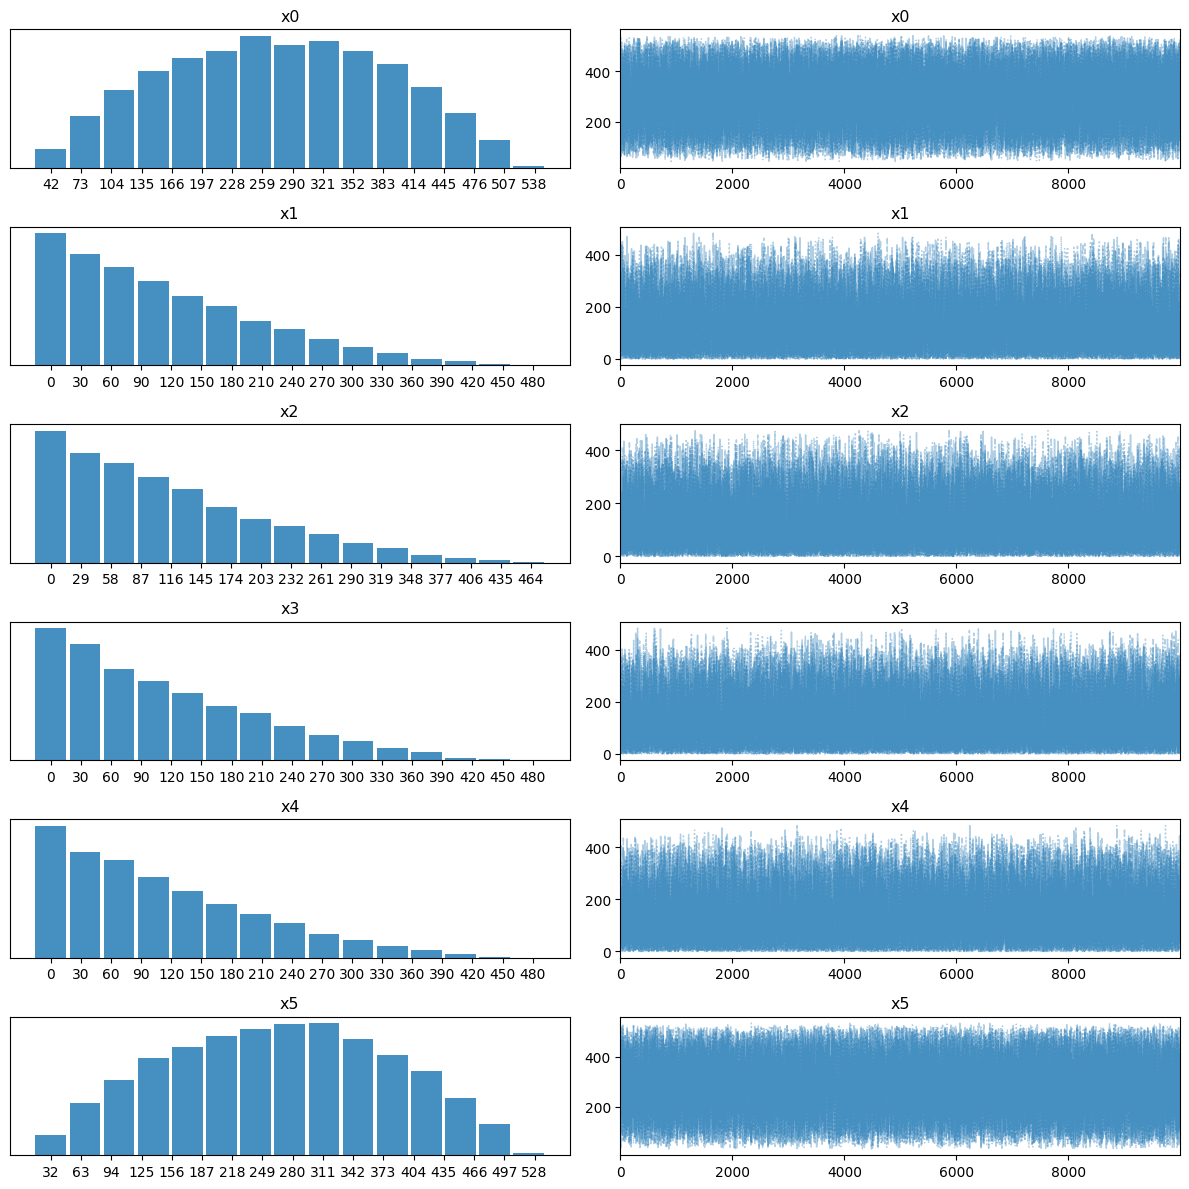

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,290.943,112.998,81.0,481.0,0.566,0.302,39994.0,39547.0,1.0
x1,126.519,97.837,0.0,306.0,0.490,0.362,39873.0,39050.0,1.0
x2,125.538,97.346,0.0,305.0,0.491,0.355,39148.0,39878.0,1.0
x3,125.713,98.247,0.0,308.0,0.494,0.352,39792.0,39761.0,1.0
x4,126.230,98.791,0.0,310.0,0.492,0.361,40412.0,39854.0,1.0
x5,282.232,113.482,71.0,473.0,0.568,0.304,39791.0,39644.0,1.0


In [7]:
az.to_netcdf(trace, f'roads_spur_con_{num_con}_rf_{reduction_factor}_bits_{num_bits}_max_int_{max_int_bv}.nc')

'roads_spur_con_3_rf_2_bits_11_max_int_1023.nc'